<h1>PHY 2200 - Computational Physics</h1>
<h2>Spring 2023</h2>

<h2>Random numbers and what they can do for <i>you</i></h2>

The following two lines import the packages ```numpy``` and ```pyplot```, which will be useful for most things we do this semester.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

<h2>Estimating $\pi$</h2>

How might we use random numbers to estimate $\pi$? Here's a wacky but ingenious strategy:

Consider throwning darts at a square. We know with certainty that they land somewhere in the square. For concreteness, let's take the square side length to be 1 meter (or foot, mile, furlong, whatever).

<img src="circle.png" width="300">

Now consider a circular arc inscribed into the square, as shown above. Two facts to note: the square's area is 1, and the circular wedge (being a quarter of a circle) has area $\frac{1}{4} \pi r^{2} = \frac{\pi}{4}$. But why does that matter?

We know that each dart will hit <i>somewhere</i> in the square. It's assumed that every point is equally likely---that's the essence of randomness. Then after many, many darts land, the square is uniformly <i>filled</i> with darts. Suppose $N_{c}$ land within the circular arc and a total of $N$ darts landed on the square. Given the uniformity, we can say that

$$\lim_{N\rightarrow\infty} \frac{N_{c}}{N} = \frac{A_{c}}{A} = \frac{\pi}{4},$$

where $A_{c} = \frac{1}{4}\pi r^{2}$ is the area of the quarter circle and $A = r^{2}$ is the area of the square. In numerical analysis, there is no such thing as taking a limit to infinity. The <i>key</i> is to do something enough times that we <i>saturate</i> the limit (i.e., "get close enough") in some controlable manner. Let's see what happens!

How do we perform this experiment numerically? Somehow, we need to simulate darts randomly landing somewhere within our square. Each dart location is given by two-dimensional coordinates, $(x,y)$. We also know that $0\leq x \leq 1$ and $0\leq y \leq 1$. As it turns out, there's a built-in <b>random number generator</b> in ```numpy```. We'll return to just <i>what</i> this means shortly, but for now you can think of this as a magic trick for generating a "random" number between 0 and 1. Here's what you type to get such a "random" number:

In [17]:
np.random.rand()

0.9695361872462056

Try re-running that command several times, and observe what happens. The human mind is particularly bad at estimating randomness, so it might behave surprisingly. What's more, we can generate <i>arrays</i> of random numbers by adding an <b>argument</b> to the <b>function</b> ```rand()```. By default, this function ```rand()``` returns a single value. If we add an argument, say ```3```, we'll get an array of three "random" values:

In [18]:
np.random.rand(3)

array([0.48295375, 0.82617194, 0.8897321 ])

The array is a useful type of data structure for ```numpy``` functions. Python naturally works with "lists," and there are many similarities (<i>and</i> subtle-but-important differences) between the two structures. It's not my intention to teach you computer programming theory or the intricacies of the Python language. We shall simply look for the quickest way to get useful answers and pick up the technology we need as we need it.

Should you want a two-dimensional array of random numbers (e.g., a <i>matrix</i>), you can create that via:

In [19]:
np.random.rand(2,3)

array([[0.4654332 , 0.76029541, 0.14189108],
       [0.16211588, 0.48039455, 0.81682907]])

Note that the $2\times 3$ array (```(2,3)```) gives two rows and three colummns. Just for fun, we can also create arrays of <b>zeros</b>. Why? Later, these will be useful for initializing arrays that will be used to store values as we compute them. One rare example of good programming practice that I will actually harp on in this course is that it's a good idea to initialize the structure that stores your ten thousand values <i>before</i> you calculate them if you're going to try to compute ten thousand values (of something). A one-dimensional example of this is:

In [20]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

And fun quirk: say you want to compute a $5\times 6$ array of zeros. The command ```np.zeros(5,6)``` seems really sensible, doesn't it? Try it. You'll get an error. The correct syntax is:

In [21]:
np.zeros((5,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Did you try it the other way? Do that. You <b>will</b> run into syntax errors in this class (and beyond). It's part of the process, whether you know the language well or not. Google (or sometimes just [StackOverflow](https://stackoverflow.com/)) is going to be your friend. But the lesson for this class is that: <b>you don't need to know the right syntax; you need to give yourself permission to look up things as you need them.</b> The goal is for you to think about <i>how</i> to solve the problem-how to think computationally. The rest can be looked up as you need it.

To the matter at hand: we need to create a large number (say $N$) of random points $(x,y)$ inside of our square. Then we need to figure out how many (say $N_{c}$) of these points lie within the circular part. Since we need coordinate pairs, let's initialize $x$ and $y$ as random sets:

In [22]:
N = 1000

x = np.random.rand(N)
y = np.random.rand(N)

Now how to test? We can look at each point and determine whether or not its distance from the origin, $d = \sqrt{x^{2}+y^{2}}$ is less than the radius (here $r=1$). So we now need to get the computer to (a) <b>loop</b> over all points and (b) perform a logical test.

For (a), there is a device known as a <b>for loop</b>, which will repeat a given task <i>for</i> some condition(s). Given each entry, we can test using an <b>if statement</b> which performs a particular operation <i>if</i> a particualr condition is met. Let's have a look at the whole process and break it down:

In [23]:
Nc = 0 #initialize number of points inside the circle to zero

#to count, we'll loop over all values (x[i],y[i]) with i starting at 0 and running over all 20 values
for i in range(0,N):
    #if x^2 + y^2 < 1, the point is inside the circle; 
    if (x[i]**2 + y[i]**2 <= 1.0):
        Nc = Nc + 1  #if inside the circle, add 1 to the running count

You'll notice numerous <i>comments</i> within that cell. Commenting your programs is a very healthy practice in which you send a message to others (and often, your future self) which explains what each line does. Sometimes we invent rather ingenious solutions to problems after a great deal of trial and error. Often, these solutions only make sense after living in the weeds of the problem for a while. You might be surprised how baffling a program you wrote can look after a few months of not thinking about the inner workings. 

All that to say, this is a public service announcement: <b>comment your code</b>.

Let's take a look at what happened. We can plot the points along with the semicircular boundary:

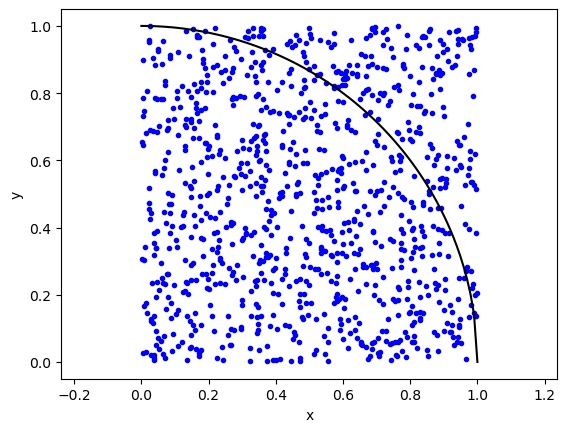

In [24]:
xc = np.linspace(0,1,100)
yc = np.sqrt(1.0-xc**2)

plt.plot(x,y,'b.')
plt.plot(xc,yc,'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Now what we <i>should</i> have is the total number of out darts (out of $N$) that landed inside the circle. Our agument is that the ratio $N_{c}/N$ should approach the ratio of areas, $\frac{\pi}{4}$ as $N$ "gets really big." So our estimate for $\pi$ is then $\pi \approx 4N_{C}/N$, or:

In [25]:
4.0*Nc/N

3.148

That's close to the actual value of 3.141952... right? Take a moment to try smaller or larger values of $N$ to get a sense for how this affects the estimate. Then congratulate yourself for performing your first <b>Monte Carlo simulation</b>. You would be surprised how much of modern computational physics uses simple devices like this to do real calculations.

<h2>Evaluating the estimate</h2>

At this point, you should have discovered that this silly dart throwing simulation appears to be a not-unreasonable way to estimate $\pi$, one of the fundamental mathematical constants. But we already have a $\pi$ button on our calculator. Even ```numpy``` knows $\pi$ to many decimal places:

In [29]:
np.pi #print(np.pi)

3.141592653589793

* Question - Did we need the ```print()``` function right there? (find out)

Depending on how large you let $N$ become, you might get 1-2 decimal places of accuracy after the 3 before Python gets really bogged down looping over a very large number of dart tosses. In this case, it's <i>easy</i> to assess the accuracy of our estimate <i>because we know the exact answer</i>. We can do any number of comparisons, but let's just look at the <b>relative error</b>. In words, you look at the difference between the estimate and the exact value. 

In [30]:
piapprox = 4.0*Nc/N

error = np.pi - piapprox
print(error)

-0.0064073464102070155


Absolute error, like this, isn't a great way to convey how close an estimate is. An error of less than 0.06 sounds small because the exact answer is roughly 3. But if we had an error of 0.06 and the exact answer was itself 0.06, this would be a much less precise estimate. So let's convert this to a fraction of the exact answer:

In [31]:
relerror = error/np.pi
print(relerror)

-0.002039521706573115


So that tells us that our estimate is only about 1.8% away from the true value. This sounds alright, but I present two important questions related to this:

1. What happens if you repeat the calculation? It's based on random numbers, so your estimate will change somewhat each time you calculate it (yes, even for fixed $N$).

2. Calculating $\pi$ is instructive. But we know the answer already. This method is actually more useful when we don't know the answer (or have any other way to calculate it easily). So how do we assess "how good our estimate is" when we don't know the exact answer?

These questions motivate the difference between <b>accuracy</b> and <b>precision</b>:
<center>
<img src="precision.png" width="300">
(image: <a href=https://wp.stolaf.edu/it/gis-precision-accuracy/>https://wp.stolaf.edu/it/gis-precision-accuracy/</a>)
</center>

Comparing to the known value is a test for accuracy of the estimate. But if we repeat the calculation and get wildly varying estimates, we would say that our estimation scheme is not precise. 

Mathematically, the Monte Carlo method is known to <i>converge</i> to the correct answer. That means, in the limit $N\rightarrow \infty$, someone can prove to you that the estimation approaches the exact answer. In computational work, our $N$ is always finite, so we will now turn our attention to how we can assess precision at some finite $N$.

The basic idea of estimating precision is to repeat the calculation an examine how the result varies due to statistical fluctuations. Note the nested thinking: we loop over a loop a large number of random values. It will help to define a function to perform the basic Monte Carlo estimation so that we can simply loop over this function. Why write something many times when you can just write it (carefully) once?

To this end, let's define:

In [32]:
def montecarloPi(N):
    
    Nc = 0
    
    x = np.random.rand(N)
    y = np.random.rand(N)
    
    rsq = x**2 + y**2
    
    for i in range(0,N):
        if (rsq[i]<=1.0):
            Nc = Nc + 1
            
    estimate = 4.0*Nc/N
    return estimate

Now we can call this thing to perform a Monte Carlo estimate of $\pi$ for any value of $N$. The only major difference from what we did above is that here we use array operations (```x*x+y*y```) to precompute the values of $r^{2}$ at the beginning rather than performing the calculation for each point. This is a simple example of <b>vectorization</b> which can get around certain operations being slow. Below, we'll see that you can actually use <b>logical indexing</b> to get around the loop entirely (and likely speed up the calculation!).

So let's do the following with our function. Define an array of $N_{samples}$ zeros. In each of these slots, we will place a Monte Carlo estimate for $\pi$.

In [33]:
Nsamples = 100
piSamples = np.zeros(Nsamples)

for i in range(0,Nsamples):
    piSamples[i] = montecarloPi(1000)
    
print(piSamples)

[3.072 3.192 3.104 3.176 3.152 3.196 3.172 3.128 3.24  3.132 3.064 3.212
 3.14  3.156 3.184 3.192 3.18  3.196 3.028 3.092 3.216 3.164 3.104 3.156
 3.088 3.244 3.136 3.112 3.168 3.172 3.196 3.176 3.132 3.176 3.164 3.08
 3.128 3.088 3.056 3.144 3.14  3.192 3.172 3.096 3.028 3.2   3.04  3.1
 3.144 3.216 3.044 3.168 3.14  3.108 3.184 3.144 3.028 3.044 3.136 3.128
 3.128 3.036 3.068 3.176 3.184 3.112 3.1   3.132 3.108 3.216 3.112 3.1
 3.212 3.124 2.98  3.148 3.092 3.108 3.108 3.044 3.152 2.976 3.148 3.132
 3.224 3.112 3.196 3.196 3.184 3.064 3.084 3.188 3.14  3.096 3.088 3.128
 3.124 3.104 3.06  3.152]


Now you or I can easily look at this list of values and say to ourselves, "Hm. They look pretty close to 3.14." We would like to be more precise. A simple measure of statistical variation is the <b>variance</b> $\sigma^{2}$, which can be <i>estimated</i> from a sample of $N$ points $x_{i}$ by

$$\sigma^{2} = \frac{\displaystyle \sum_{i=1}^{N}(x_{i}-\overline{x})^{2}}{N-1}$$

Here $\overline{x}$ is the average value of the $x_{i}$, and this variance is essentially averaging the squared (why?) deviation of the points from the mean. If we take the square root to obtain the <b>standard deviation</b> $\sigma$, we get a rough estimate for the average distance of each point from the average. That's a decent estimate of how much uncertainty we have in our estimate since it measures the spread of values.

Lucky for us, ```numpy``` has this function built in and we can just use it.

In [34]:
piEstimate = np.average(piSamples)
piUncert = np.sqrt(np.var(piSamples))

print('Our estimate of pi is ' + str(piEstimate) + '+/-' + str(piUncert))

Our estimate of pi is 3.1319600000000003+/-0.056072795542936905


Note the concatenation (joining together) of strings as well as the conversion of floating point values to strings. Also, note that there's another function ```np.std()``` which returns $\sigma$ directly. You should check to see if it's identical or just close to what we found.

What this says is that the estimate for $\pi$ should be within about $0.047$ of the real value. Indeed, it is! But now we have confidence for our estimate independent of knowing the actual value. 

Getting $\pi \approx 3.15 \pm 0.05$ is potentially a little underwhelming. Of course, we could crank up the value of $N$, but it turns out there are somewhat diminishing returns (doubling $N$ won't cut the error in half). Let us now examine how the statistical error ($\sigma$) scales with $N$.

Let us abstract our thinking by one additional level and define a function which does what we just did for $N_{samples}$ estimates of $\pi$, each with $N$ individual darts:

In [35]:
def montecarloPiError(N,Nsamples):
    piSamples = np.zeros(Nsamples)

    for i in range(0,Nsamples):
        piSamples[i] = montecarloPi(N)
        
    return np.std(piSamples)

So this one function, which calls another function inside a loop, should return the single value for the standard deviation of a bunch ($N_{samples}$) of independent Monte Carlo samples for $\pi$. Try it:

In [36]:
montecarloPiError(1000,100)

0.0499987839852131

Roughly what we got last time, right? Good. Now let's try it for a range of $N$ values. Fun tidbit: you can use Greek letters as variable names by typing them out, beginning with a backslash, and hitting ```TAB```. So $\sigma$ appears from ```\sigma``` followed by ```TAB```.

In [37]:
Nvals = [10,30,100,300,1000,3000,10000,30000,100000]
σ = np.zeros(len(Nvals)) #make an array of zeros of the same size as Nvals

for i in range(0,len(Nvals)): #loop over each of the values of N (len() gives the length of a list)
    σ[i] = montecarloPiError(Nvals[i],100) #for each N, calculate σ

That might have taken a moment or two. For a reasonably small data set, we can always just have a look:

In [38]:
print(σ)

[0.48166378 0.2981424  0.18360436 0.07935417 0.05273578 0.03588445
 0.01498499 0.00954146 0.00497455]


The values get smaller as $N$ increases. Good, that's what the mathematicians say is supposed to happen. It's always nice when theory and experiment (reality) agree. But we can actually look a little closer at <i>how</i> the convergence occurs. One way to do this visually is to make a simple plot of $\sigma$ vs $N$:

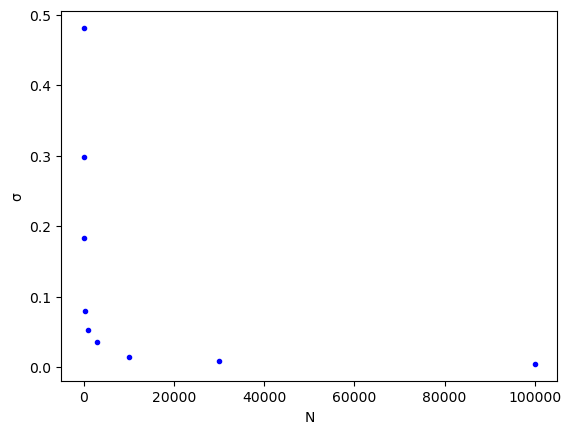

In [39]:
plt.plot(Nvals,σ,'b.') #the 'b.' means "blue dots" but you could use 'k-' for "black line" or any number of variations
plt.xlabel('N')
plt.ylabel('σ')
plt.show()
# you can just use this as a template for a basic plot in the future


The plot is clearly nonlinear (fancyspeak for "not a straight line"), and we would like to have a sense for how it behaves. Why? Because if we know the convergence rate, we can work out how big $N$ has to be to get the appropriate precision. 

You might have some experience doing "curve fitting," and it turns out ```numpy``` can do that kind of operation also. But when dealing with nonlinear data, it's often helpful to get a sense for what kind of function is appropriate by using <b>logarithmic scales</b>. For example, suppose we have a data set $(x_{n},y_{n})$ that shows <b>power-law</b> behavior:

$$y(x) = Ax^{n}$$

for some constants $A$, $n$. Take the natural logarithm (or really <i>any</i> logarithm) of both sides to get

$$\ln y = \ln[Ax^{q}] = \ln x^{q} + \ln A = q\ln x + \ln A$$

In the last steps, I used $\ln ab = \ln a + \ln b$ and $\ln a^{b} = b\ln a$. What this means ($\ln y = q\ln x + \ln A$) is that the logarithm of $y$ is a <i>linear</i> function with respect to the logarithm of $x$. Plotting $\ln y$ vs $\ln x$ is referred to as a log-log plot, and it's a quick test for power-law behavior. Another type of common trend is $y = Ae^{\lambda x}$ which can be linearized by plotting $\ln y$ vs $x$ (semi-log scale). But the power-law behavior turns out to be relevant here.

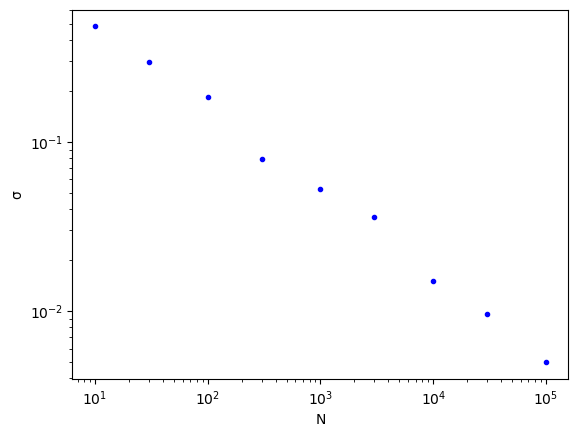

In [40]:
plt.loglog(Nvals,σ,'b.')
plt.xlabel('N')
plt.ylabel('σ')
plt.show()

That's not a bad straight line! In order words, we expect $\sigma \approx A N^{q}$ for some constants $A$ and $q$. We can obtain these values by performing a linear fit on $\ln \sigma$ vs $\ln N$ as follows. The function ```polyfit(x,y,n)``` will actually perfrom a polynomial fit (of degree $n$) to a data set $(x,y)$. So for a straight line ($n = 1$):

In [41]:
p = np.polyfit(np.log(Nvals),np.log(σ),1)

The array ```p``` will be a set of coefficients for the polynomial fit, $y = p_{n}x^{n} + \cdots + p_{0}$ so we should get two values corresponding to $\ln \sigma = p_{1}\ln N + p_{0}$, or

$$\sigma = e^{p_{1}\ln N + p_{0}} = e^{p_{0}} N^{p_{1}}$$

In [42]:
print(p)

[-0.49834222  0.47568629]


That is $\sigma \sim N^{-0.49}$. Mathematicians tell us that $\sigma$ should decay as $\frac{1}{\sqrt{N}} = N^{-1/2}$, so we're actually pretty close. Letting $N = 10^{5}$ stand in for infinity is pretty crude, so it's expected that we wouldn't quite saturate the limit for this convergence rate.

But the <i>meaning</i> of this is the following: If $\sigma$ behaves like $N^{-1/2}$, we have to use <b>four</b> times as many samples to get half the error. To reduce the error by a factor of 10, we'd need to increase the samples by a factor of 100. It's a costly method!

<h2>Exercises</h2>

<h3>1. The Monty Hall Problem</h3>

[Monty Hall](https://en.wikipedia.org/wiki/Monty_Hall_problem) (no relation to Monte Carlo) was a TV host in the 1960s-70s who gave contenstants the following challenge:

There are three doors. Behind one door is a brand new car. Behind each of the other two doors is a goat (presumably undesirable). A contestant would select one door (let's say Door 1). Before revealing what was behind the door, Monty Hall would open one of the two doors not chosen (let's say Door 2), revealing a goat. At this point the car has to be behind either Door 1 or Door 3.

The real kicker comes here: Monty would give the guest the option of switching. The question is: does it make more sense to stick with the original choice or to switch now that more information has been revealed? This can be quite counterintuitive, so we're going to run a simulation to determine the optimal strategy.

Also, a fun video on how to think about this problem: [Numberphile](https://www.youtube.com/watch?v=7u6kFlWZOWg)

In [61]:
def doorNumber2(doorCar,doorContestant):
    # YOUR CODE HERE
    c=0
    while(c==0):
        c=1
        doorMonty=np.random.randint(3)    # 2
        if (doorMonty==doorContestant):
            c=0
        if (doorMonty==doorCar):
            c=0
    return 3-doorMonty-doorContestant
    raise NotImplementedError()

In [62]:
'''case 1'''
assert np.isclose(1,doorNumber2(1,2))

In [63]:
N = 10000

Nswitch = 0 
Nstay = 0

for i in range(0,N):
    #determine which door has car
    doorCar = np.random.randint(3)    # 0
    
    #contestant selects door
    doorContestant = np.random.randint(3)    # 1
    
    doorRemains = doorNumber2(doorCar,doorContestant)
    
    if (doorContestant==doorCar):
        Nstay = Nstay + 1
        
    if (doorRemains==doorCar):
        Nswitch = Nswitch + 1
        
print('Staying wins ' + str(Nstay/N))
print('Switching wins ' + str(Nswitch/N))

Staying wins 0.3317
Switching wins 0.6683


<h3>2. Semi-log plots and exponential fitting</h3>

Consider the following data set:

In [24]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [1.00,0.354,0.128,0.0469,0.0172,0.00630,0.00231,0.000850,0.000312,0.000148]

Make a plot of the data using semilog axes (determine whether ```semilogx()``` or ```semilogy()``` is what you want). Based on the plots, write a function that uses ```polyfit``` to determine the constants $\lambda$ and $A$ in 

$$y = Ae^{\lambda t}$$

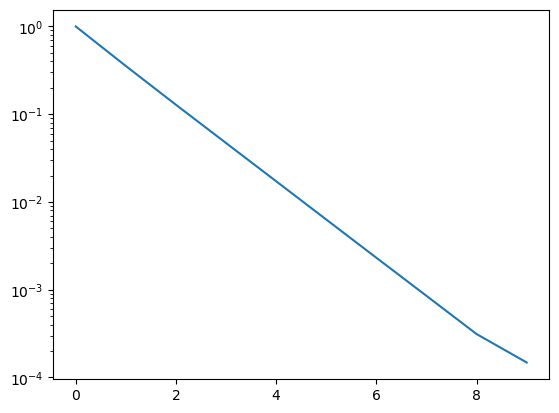

In [25]:
#Step 1: Plots:

## Make plots here:
plt.semilogy(y)

In [26]:
# linear fit to ln(y) vs x *OR* ln(y) vs ln(x)

def λfit(x,y):
    # YOUR CODE HERE
    p = np.polyfit(x,np.log(y),1)
    
    λ = p[0]
    A = np.exp(p[1])
    
    return λ, A
    raise NotImplementedError()

In [27]:
λ,A = λfit(x,y)

<h3>3. Testing randomness</h3>

When you call ```np.random.rand()```, do you <i>really</i> get a truly random number? It turns out you don't. The proper term is <b>pseudorandom</b> numbers. But for practical purposes, they are often "close enough."

So what properties would a truly random set of numbers have? We used the main idea already in doing the Monte Carlo simulation of $\pi$: they are of uniform probability density. So just to simplify, let's take a sequence of random numbers $0\leq x_{i} \leq 1$. First, since the probability distribution is uniform, we expect the number of values smaller than $\frac{1}{2}$ to be equal to the number of values larger than $\frac{1}{2}$ (up to statistical fluctuations). More precisely, the average should be pretty close to 0.5.

Check that this is (approximately) true for a large list of random values:

In [28]:
x = np.random.rand(10000)

print(np.average(x))

0.494958382827861


More generally, the higher <b>moments</b> should satisfy nice properties as well. To get a sense for why this is, try sorting the numbers (```np.sort``` is your friend) and make a simple plot (```plt.plot(np.sort(x),'k.')```). What do you see?

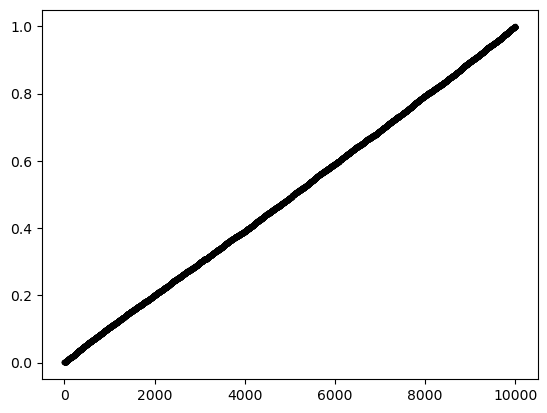

In [29]:
plt.plot(np.sort(x),'k.')
plt.show()

It should look essentially like a straight line. That's not surprising if this really is approximating a uniform distribution. In the limit $N\rightarrow \infty$, we fill in <i>all</i> the real values on $[0,1]$. But this means we can compare the properties of this sample to those of the continuous line $y = x$ (which samples <i>every</i> value in this range). One thing I know is that the average $\overline{y}$ is

$$\overline{y} = \frac{\displaystyle \int_{0}^{1}xdx}{\displaystyle \int_{0}^{1}dx} = \frac{1}{2}.$$

That's what we've already seen. But the higher moments behave according to 

$$\overline{y^{2}} = \int_{0}^{1}x^{n}dx = \frac{1}{n+1}$$

In terms of the discrete, randomly sample values that means (for truly random $x_{i}$) we should get

$$\frac{1}{N}\sum_{i=1}^{N}x_{i}^{n} \Longrightarrow \frac{1}{n+1}$$

Write a function ```randomMoment(n)``` which computes the $n^{\mbox{th}}$ moment of the sample as described here and also returns the relative error (with respect to the predicted value).

In [30]:
def randomMoment(x,n):
    # YOUR CODE HERE
    N = len(x)
    moment = sum(x**n)/N
    predicted = 1/(n+1)
    relerror = abs(moment-predicted)/predicted
    
    return moment, relerror
    raise NotImplementedError()

In [31]:
'''case 1'''
x = np.random.rand(1000)
avg, err = randomMoment(x,1)
assert np.isclose(0.5,avg,atol=.05)

In [32]:
randomMoment(x,2)

(0.3402305480110457, 0.020691644033137113)

In [33]:
randomMoment(x,10)

(0.09396085734262806, 0.03356943076890863)

<h3>4. Introduction to Monte Carlo integration</h3>

The previous suggests that the Monte Carlo approach is also quite useful for evaluating integrals (you know, your favorite task from calculus) numerically. The basic idea is illustrated by considering some function of a single variable, say $f(x)$. We'll see later that this will also work for multi-dimensional integrals. In fact it's far more useful for multi-dimensional integrals.

Let's say we wish to compute 

$$\int_{a}^{b}f(x)dx$$

Then if we can randomly sample points on $[a,b]$, we can approximate the integral as

$$\int_{a}^{b}f(x)dx = \lim_{N\rightarrow \infty}\sum_{i=1}^{\infty}f(x_{i})$$

Indeed, this is essentially how we worked out the ratio of areas when estimating $\pi$. This Monte Carlo integration is closely related to the <b>mean value theorem</b> in calculus. 

Write a function which calculates <i>any</i> function of $x$ you like. It could be $y = x^{2}$, $\cos x$, $\ln x$, whatever. 

In [34]:
def integrand(x):
    f = x**2
    return f

Now that you have a function to integrate, write a short Python function to perform the Monte Carlo integration of ```f(x)``` over the range $a\leq x \leq b$. The first step is to construct a random sampling of points in this range. I would recommend taking a random sample between 0 and 1 (```random.rand()```) and the scaling it up by a multiplicative factor $(b-a)$ to get the right range. This is now a sample ranging from $0$ to $b-a$. If you add $a$ to each value, it represents a random sample on the correct range.

If you want, you can test your function with some known integral like

$$\int_{0}^{1}x^{2}dx = \frac{1}{3}$$

(or <i>any</i> other known integral)

In [45]:
def mcint(f,a,b,N):
    # YOUR CODE HERE
    x = a+(b-a)*np.random.rand(N)
    integ = (1/N)*sum(f(x))
    return integ
    raise NotImplementedError()

In [46]:
'''case 1'''
def f1(x):
    return x**2

assert np.isclose(0.33,mcint(f1,0,1,10000),atol=.05)

<h3>5. Logical indexing</h3>

One of the pitfalls of Python is that it's <i>very</i> slow with loops. You might not notice this for simple calculations, but it becomes quite evident when we scale up to larger calculations. Just keep adding zeros to $N$ in a simple Monte Carlo calculation until starts taking a realy long time. 

One way to ameliorate this slowness is to avoid using loops. How? Some operations can be <b>vectorized</b> to make use of speedy algorithms, essentially performing the loopable operation in what looks like a single step. For example, if we want to compute $r^{2} = x^{2} + y^{2}$ for each $(x,y)$ in a set, we can write

```rsq = x**2 + y**2```

However, we still looped over all the values of $r^{2}$ and tested whether each was greater than unity. We can actually do that <i>without</i> an explicit loop using <b>logical indexing</b>, which uses a logical statement in the index to automatically pick off all values satisfying a certain condition. For example, consider the following array:

In [47]:
z = np.array([3,1,6,9,2,10,4,8,5,7])

Suppose we want only the values larger than 5. We could loop over the values and test each one <i>or</i> we can use the following trick:

In [48]:
z[z>5]

array([ 6,  9, 10,  8,  7])

When the index of the array element is replaced by a logical test ("is the entry larger than 5"), ```numpy``` will return only the entries which pass the test while preserving the original ordering. Maybe we don't care about the values, but only <i>how many</i> values pass a given test. In this case, we can use the ```len()``` function to simply extract the length:

In [49]:
len(z[z>5])

5

Use this basic type of logical indexing to rewrite the function ```montecarloPi()``` without using a loop. Does this new version show any obvious change to performance? You might need to crank up $N > 10^{6}$ to see it.

In [58]:
def montecarloPiLogical(N):
    # YOUR CODE HERE
    x = np.random.rand(N)
    y = np.random.rand(N)
    
    rsq = x**2 + y**2
    Nc = len(rsq[rsq<=1])
    
    estimate = 4.0*Nc/N
    return estimate
    raise NotImplementedError()

In [59]:
montecarloPiLogical(100000000)

3.14190824

In [60]:
montecarloPiLogical(10000000)

3.1425432